In [53]:
import numpy as np
import pandas as pd
import datetime
import utils
import models
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [6]:
worksheet = utils.get_master_sheet()
df = pd.DataFrame(worksheet.get_all_records())
df.head()

/var/folders/rs/6tl6pps1563b8sz8xgxyg9bm0000gn/T/ipykernel_52556/2487260646.py:1: DeprecationWarning: [Deprecated][in version 6.0.0]: client_factory will be replaced by gspread.http_client types
  worksheet = utils.get_master_sheet()


,timestamp,game_date,game_time,name,team,position,opponent,stat,line,hit_percentage,margin,predicted_action,actual_stat,outcome,true_action
0,11/19/2023 17:02:49,2023-11-19,5:02:20 PM,Aaron Gordon,DEN,F,CLE,Points,14.5,46.33,3.67,UNDER,11.0,WIN,UNDER
1,11/19/2023 17:02:49,2023-11-19,5:02:20 PM,Darius Garland,CLE,G,DEN,Points,24.0,23.05,26.95,UNDER,26.0,LOSE,OVER
2,11/19/2023 17:02:49,2023-11-19,5:02:20 PM,Kentavious Caldwell-Pope,DEN,G,CLE,Points,8.5,56.33,6.33,OVER,9.0,WIN,OVER
3,11/19/2023 17:02:49,2023-11-19,5:02:20 PM,Evan Mobley,CLE,C,DEN,Points,18.5,42.00,8.00,UNDER,16.0,WIN,UNDER
4,11/19/2023 17:02:49,2023-11-19,5:02:20 PM,Michael Porter Jr.,DEN,F,CLE,Points,17.5,54.67,4.67,OVER,21.0,WIN,OVER


In [62]:
X = []
Y = []
for i, row in df.iterrows():
    if row['true_action'] == 'PUSH':
        continue
    if pd.isna(row['true_action']) or row['true_action'] == '':
        continue
    player_name = row['name']
    stat = row['stat']
    pp_line = float(row['line'])
    opponent = row['opponent']
    game_date=datetime.datetime.strptime(row['game_date'], '%Y-%m-%d')
    gamelog = utils.get_games_by_player(player_name, game_date)
    stat_name = utils.get_stat_name(stat)
    past_5 = models.avg_player_stats_pastngames(gamelog, stat_name, pp_line, 5)
    past_10 = models.avg_player_stats_pastngames(gamelog, stat_name, pp_line, 10)
    past_15 = models.avg_player_stats_pastngames(gamelog, stat_name, pp_line, 15)
    season = models.avg_player_stats_season(gamelog, stat_name, pp_line)
    vs_opp = models.avg_player_stats_vsteam(gamelog, stat_name, pp_line, opponent)
    thisgame = gamelog[gamelog['GAME_DATE'] == game_date]
    if len(thisgame) == 0:
        away = 0.5
    else:
        thisgame = thisgame.iloc[0]
        location = 'away' if '@' in thisgame['MATCHUP'] else 'home'
        away = models.avg_player_stats_homeaway(gamelog, stat_name, pp_line, location)
    # b2b=
    X.append([past_5, past_10, past_15, season, vs_opp, away])
    Y.append(1 if row['true_action'] == 'OVER' else 0)
    print(f'{i}/{len(df)}')

0/920
1/920
2/920
3/920
4/920
5/920
6/920
7/920
8/920
9/920
10/920
11/920
12/920
13/920
14/920
15/920
16/920
17/920
18/920
19/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


20/920
21/920
22/920
23/920
24/920
25/920
26/920
27/920
28/920
29/920
30/920
31/920
32/920
33/920
34/920
35/920
36/920
37/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


38/920
39/920
40/920
41/920
42/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


43/920
44/920
45/920
46/920
47/920
48/920
49/920
50/920
51/920
52/920
53/920
54/920
55/920
56/920
57/920
59/920
60/920
62/920
63/920
64/920
65/920
66/920
67/920
68/920
70/920
71/920
72/920
74/920
75/920
76/920
77/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


78/920
79/920
80/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


81/920
82/920
83/920
84/920
85/920
86/920
87/920
88/920
89/920
90/920
91/920
92/920
93/920
94/920
96/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


97/920
98/920
99/920
100/920
101/920
102/920
103/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


104/920
105/920
107/920
108/920
109/920
110/920
111/920
112/920
113/920
114/920
115/920
116/920
117/920
118/920
119/920
120/920
121/920
122/920
123/920
124/920
125/920
126/920
127/920
129/920
130/920
131/920
132/920
133/920
134/920
135/920
136/920
137/920
138/920
139/920
140/920
141/920
142/920
143/920
144/920
145/920
146/920
147/920
148/920
149/920
150/920
151/920
152/920
153/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


154/920
155/920
156/920
157/920
158/920
159/920
160/920
161/920
162/920
163/920
164/920
165/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


166/920
167/920
168/920
169/920
170/920
171/920
172/920
173/920
174/920
175/920
176/920
177/920
178/920
179/920
180/920
181/920
182/920
183/920
184/920
185/920
186/920
187/920
188/920
189/920
190/920
191/920
192/920
193/920
194/920
195/920
196/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


197/920
198/920
199/920
200/920
201/920
202/920
203/920
204/920
205/920
206/920
207/920
208/920
209/920
210/920
211/920
212/920
213/920
214/920
215/920
216/920
217/920
218/920
219/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


220/920
221/920
222/920
223/920
224/920
225/920
226/920
227/920
228/920
229/920
230/920
231/920
232/920
233/920
234/920
235/920
236/920
237/920
238/920
239/920
240/920
241/920
242/920
243/920
244/920
245/920
246/920
247/920
248/920
249/920
250/920
251/920
252/920
253/920
254/920
255/920
256/920
257/920
258/920
259/920
260/920
261/920
262/920
263/920
264/920
265/920
266/920
267/920
268/920
269/920
270/920
271/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


272/920
273/920
274/920
275/920
276/920
277/920
278/920
279/920
280/920
282/920
283/920
284/920
286/920
287/920
288/920
289/920
290/920
291/920
292/920
293/920
294/920
295/920
296/920
297/920
298/920
301/920
302/920
303/920
304/920
305/920
306/920
307/920
308/920
309/920
310/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


311/920
312/920
313/920
314/920
315/920
316/920
317/920
318/920
319/920
320/920
321/920
322/920
323/920
324/920
325/920
326/920
327/920
328/920
329/920
330/920
331/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


332/920
333/920
334/920
335/920
336/920
337/920
338/920
339/920
340/920
341/920
342/920
343/920
344/920
345/920
346/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


347/920
348/920
349/920
350/920
351/920
352/920
353/920
354/920
355/920
356/920
357/920
358/920
359/920
360/920
361/920
362/920
363/920
364/920
365/920
366/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


367/920
368/920
369/920
370/920
371/920
372/920
373/920
374/920
375/920
376/920
377/920
378/920
379/920
380/920
381/920
382/920
383/920
384/920
385/920
386/920
387/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


388/920
389/920
390/920
391/920
392/920
393/920
394/920
395/920
396/920
397/920
398/920
399/920
400/920
401/920
402/920
403/920
404/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


405/920
406/920
407/920
408/920
409/920
411/920
412/920
413/920
414/920
415/920
416/920
417/920
418/920
419/920
420/920
421/920
422/920
423/920
424/920
425/920
426/920
427/920
428/920
429/920
430/920
431/920
432/920
433/920
434/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


435/920
436/920
437/920
438/920
439/920
440/920
441/920
442/920
443/920
444/920
445/920
446/920
447/920
448/920
449/920
450/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


451/920
452/920
453/920
454/920
455/920
456/920
457/920
458/920
459/920
460/920
461/920
462/920
463/920
464/920
465/920
466/920
467/920
468/920
469/920
470/920
471/920
472/920
473/920
474/920
475/920
476/920
477/920
478/920
479/920
480/920
481/920
482/920
483/920
484/920
485/920
486/920
487/920
488/920
489/920
490/920
491/920
492/920
493/920
494/920
495/920
496/920
497/920
498/920
499/920
500/920
501/920
502/920
503/920
504/920
505/920
506/920
507/920
508/920
509/920
510/920
511/920
512/920
513/920
514/920
515/920
516/920
517/920
518/920
519/920
520/920
521/920
522/920
523/920
524/920
525/920
526/920
527/920
528/920
529/920
530/920
531/920
532/920
533/920
534/920
535/920
536/920
537/920
538/920
539/920
540/920
541/920
542/920
543/920
544/920
545/920
546/920
547/920
548/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


549/920
550/920
551/920
553/920
554/920
555/920
556/920
557/920
558/920
560/920
561/920
562/920
563/920
564/920
566/920
568/920
569/920
570/920
571/920
572/920
573/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


574/920
575/920
576/920
577/920
580/920
581/920
582/920
584/920
585/920
586/920
587/920
588/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


589/920
590/920
591/920
592/920
593/920
594/920
595/920
596/920
597/920
598/920
599/920
600/920
601/920
602/920
603/920
604/920
605/920
606/920
607/920
608/920
609/920
610/920
611/920
613/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


614/920
615/920
616/920
617/920
618/920
619/920
620/920
621/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


622/920
623/920
624/920
625/920
626/920
627/920
628/920
629/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


630/920
631/920
632/920
633/920
634/920
635/920
636/920
637/920
638/920
639/920
640/920
641/920
642/920
643/920
644/920
645/920
646/920
647/920
648/920
649/920
650/920
651/920
652/920
653/920
654/920
655/920
656/920
657/920
658/920
659/920
660/920
661/920
663/920
664/920
665/920
666/920
667/920
668/920
669/920
670/920
671/920
672/920
673/920
674/920
675/920
676/920
677/920
678/920
679/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


680/920
681/920
682/920
683/920
684/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


685/920
686/920
687/920
688/920
689/920
690/920
691/920
693/920
694/920
695/920
696/920
697/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


698/920
699/920
700/920
701/920
702/920
703/920
704/920
705/920
706/920
707/920
708/920
709/920
710/920
711/920
712/920
714/920
715/920
716/920
717/920
718/920
719/920
720/920
721/920
722/920
723/920
724/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


725/920
726/920
727/920
728/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


729/920
730/920
731/920
732/920
733/920
734/920
735/920
736/920
737/920
738/920
739/920
740/920
741/920
742/920
743/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


744/920
745/920
746/920
747/920
748/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


749/920
750/920
751/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


752/920
753/920
754/920
755/920
756/920
757/920
758/920
759/920
760/920
761/920
762/920
763/920
764/920
765/920
766/920
767/920
768/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


769/920
770/920
771/920
772/920
773/920
774/920
775/920
776/920
777/920
778/920
779/920
780/920
781/920
782/920
783/920
784/920
785/920
786/920
787/920
788/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


789/920
790/920
791/920
792/920
793/920
794/920
795/920
796/920
797/920
798/920
799/920
800/920
801/920
802/920
803/920
804/920
805/920
806/920
807/920
808/920
809/920
811/920
812/920
813/920
814/920
815/920
816/920
817/920
818/920
819/920
820/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


821/920
822/920
823/920
824/920
825/920
826/920
827/920
828/920
829/920
830/920
831/920
832/920
834/920
835/920
836/920
837/920
838/920
839/920
840/920
841/920
842/920
844/920
845/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


846/920
847/920
848/920
849/920
850/920
852/920
853/920
854/920
855/920
856/920
857/920
858/920
859/920
860/920
861/920
862/920
863/920
866/920
867/920
868/920
869/920
870/920
872/920
873/920
875/920
876/920
877/920
878/920
879/920
880/920
881/920
882/920
884/920
885/920
886/920
887/920
889/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


891/920
892/920
895/920
896/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


897/920
898/920
899/920
900/920
902/920
903/920
904/920
905/920


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([games_cur_df, games_last_df])


906/920
907/920
908/920
909/920
910/920
911/920
912/920
913/920
914/920
915/920
916/920
917/920
918/920
919/920


In [63]:
X = np.array(X)
y = np.array(Y)
# xdata = X[:, [0, 3]]
perm = np.random.permutation(len(X))
X = X[perm]
y = y[perm]
split = int(0.8*len(X))
X_train = X[:split, :]
X_test = X[split:, :]
y_train = y[:split]
y_test = y[split:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(706, 6) (177, 6) (706,) (177,)


-0.4931548356902651

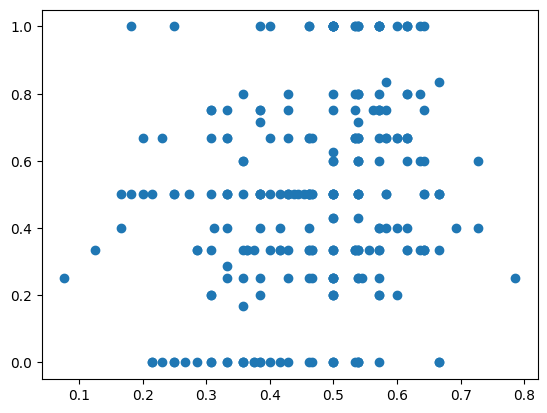

In [59]:
plt.scatter(X[:, 1], X[:, 2])
np.corrcoef(X)[2, 1]

In [64]:
clf = LogisticRegression().fit(X_train, y_train)

In [65]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [66]:
coef = clf.coef_[0]
'''
y = b0 + b1x1 + b2x2 + ...
p = b0 + b1x1 + b2x2 + ...
odds = p/1-p
log odds = log(p/1-p)
log(p/1-p) = b0 + b1x1 + b2x2 + ...
log(p/1-p) = b0 + 2.22*past5 + 1.14*past10 + 0.58*past15 + 0.73*season + 3.36*season - 0.007*away
p = sigmoid(b0 + 2.22*past5 + 1.14*past10 + 0.58*past15 + 0.73*season + 3.36*season - 0.007*away)

b7*points + b8*assists + ...
H0: b7 = b8
'''
print(f'p = sigmoid(b0 + {coef[0]}*past5 + {coef[1]}*past10 + {coef[2]}*past15 + {coef[3]}*season + {coef[4]}*vs_opp + {coef[5]}*away)')

p = sigmoid(b0 + 3.167972451540312*past5 + 0.4124034361943442*past10 + 0.9633793749011924*past15 + 0.36375378549533893*season + 4.691722981680915*vs_opp + -0.43995599400484003*away)


In [67]:
print(f'Accuracy on train set: {clf.score(X_train, y_train)}')
print(f'Accuracy on test set: {clf.score(X_test, y_test)}')

Accuracy on train set: 0.7762039660056658
Accuracy on test set: 0.7966101694915254


In [71]:
print(np.argmax(clf.predict_proba(X_test[0:10, :]), axis=1))
print(y_test[0:10])

[0 1 0 0 0 0 0 0 1 1]
[0 1 0 1 0 0 0 0 1 1]
